## **INITIALIZE** ##

In [ ]:
# code from https://github.com/AusterweilLab/snafu-py/blob/master/snafu/__init__.py

import pickle
import networkx as nx
import numpy as np
#import scipy.cluster
#import scipy.stats
#import scipy
import operator
import math
import sys
import copy
import csv
import warnings
import json
import os
import sys


from numpy.linalg import inv
from itertools import *
from datetime import datetime

In [ ]:
! pip install pattern

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 59.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.5/89.5 kB 8.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 65.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.4/348.4 kB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pattern: filename=Pattern-3.6-py3-none-any.whl size=22332702 sha256=1f67899fe356c4d139bcb5312ea0f326afe11f9c704ce395ae37e0cba0b059b7
  Stored in directo

In [ ]:
! pip install gensim

In [ ]:
import gensim
import pattern

## **LOADING DATA AS PANDAS DF**

Note: One empty grocery list, participant 34 (age 7)
One empty zoo list, participant 33 (age 5)

*Make sure to replace file paths*

In [ ]:
# ALERT: REMEMBER TO MOUNT THE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
# read in fluency lists and create df of all the lists
url = "/content/drive/MyDrive/Annie Senior Thesis/Results, Semantic Network Models/Fluency Lists Processing Analysis/fluency_lists_v1/List_p0%02d - p0%02d.csv"
df = pd.read_csv(url % (7, 7))

for i in range (8, 50):

  # we are missing these participants
  if i in [16, 17, 27, 39]: continue

  df = pd.concat((df, pd.read_csv(url % (i, i))))


In [ ]:
df

,Unnamed: 0,item,t_start,t_end,participant_id,category_id,category,round,t_start_dist,t_end_dist,t_dist_avg
0,0,track,84560,86400,7,0,toys,0,0,0,0.0
1,1,dinosaur,84560,86400,7,0,toys,0,0,0,0.0
2,2,motorcycle,93600,96960,7,0,toys,0,9040,10560,9800.0
3,3,horse,93600,96960,7,0,toys,0,0,0,0.0
4,4,dump truck,102640,103440,7,0,toys,0,9040,6480,7760.0
...,...,...,...,...,...,...,...,...,...,...,...
88,7,sea turtle,1292600,1307640,49,2,zoo,4,0,0,NaN
89,8,ray,1307640,1325000,49,2,zoo,4,15040,17360,NaN
90,9,halibut,1307640,1325000,49,2,zoo,4,0,0,NaN
91,10,jellyfish,1325000,1351880,49,2,zoo,4,17360,26880,NaN


In [ ]:
df[df['participant_id'] == 15]

,Unnamed: 0,item,t_start,t_end,participant_id,category_id,category,round,t_start_dist,t_end_dist,t_dist_avg
0,0,Vegetables,326000,352000,15,4,grocery,1,0,0,0.0
1,1,fruits,326000,352000,15,4,grocery,1,0,0,0.0
2,2,pizza,326000,352000,15,4,grocery,1,0,0,0.0
3,3,tools,326000,352000,15,4,grocery,1,0,0,0.0
4,4,foods,326000,352000,15,4,grocery,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
155,12,Crab,1810520,1811540,15,2,zoo,4,4520,1020,2770.0
156,13,Jellyfish,1811540,1813280,15,2,zoo,4,1020,1740,1380.0
157,14,Bamboo sharks,1814380,1816500,15,2,zoo,4,2840,3220,3030.0
158,15,epaulette sharks,1818200,1819500,15,2,zoo,4,3820,3000,3410.0


In [ ]:
url = "/content/drive/MyDrive/Annie Senior Thesis/Results, Semantic Network Models/LexPlay_animals.csv"
animals_df = pd.read_csv(url)

In [ ]:
animals_df

,Unnamed: 0,id,item,category_id,category,round,listnum
0,66,7,Tiger,1,animals,2,1
1,67,7,leopard,1,animals,2,1
2,68,7,cheetah,1,animals,2,1
3,69,7,lion,1,animals,2,1
4,70,7,lizard,1,animals,2,1
...,...,...,...,...,...,...,...
1117,68,49,cheetah,1,animals,3,78
1118,69,49,fox,1,animals,3,78
1119,70,49,deer,1,animals,3,78
1120,71,49,Stingray,1,animals,3,78


In [ ]:
url = "/content/drive/MyDrive/Annie Senior Thesis/Results, Semantic Network Models/LexPlay_foods.csv"
foods_df = pd.read_csv(url)

In [ ]:
foods_df

,Unnamed: 0,id,item,category_id,category,round,listnum
0,31,7,pizza,3,foods,1,1
1,32,7,mac and cheese,3,foods,1,1
2,33,7,pasta,3,foods,1,1
3,34,7,waffles,3,foods,1,1
4,35,7,pancakes,3,foods,1,1
...,...,...,...,...,...,...,...
1129,76,49,Chicken,3,foods,4,78
1130,77,49,Carrot,3,foods,4,78
1131,78,49,Veggie,3,foods,4,78
1132,79,49,Blueberry,3,foods,4,78


In [ ]:
url = "/content/drive/MyDrive/Annie Senior Thesis/Results, Semantic Network Models/LexPlay_zoo.csv"
zoo_df = pd.read_csv(url)

In [ ]:
zoo_df

,Unnamed: 0,id,item,category_id,category,round,listnum
0,12,7,giraffe,2,zoo,1,1
1,13,7,lizard,2,zoo,1,1
2,14,7,tiger,2,zoo,1,1
3,15,7,lion,2,zoo,1,1
4,16,7,leopard,2,zoo,1,1
...,...,...,...,...,...,...,...
934,88,49,sea turtle,2,zoo,4,77
935,89,49,ray,2,zoo,4,77
936,90,49,halibut,2,zoo,4,77
937,91,49,jellyfish,2,zoo,4,77


In [ ]:
url = "/content/drive/MyDrive/Annie Senior Thesis/Results, Semantic Network Models/LexPlay_grocery.csv"
grocery_df = pd.read_csv(url)

In [ ]:
grocery_df

,Unnamed: 0,id,item,category_id,category,round,listnum
0,47,7,Apple,4,grocery,2,1
1,48,7,orange,4,grocery,2,1
2,49,7,carrot,4,grocery,2,1
3,50,7,broccoli,4,grocery,2,1
4,51,7,chicken,4,grocery,2,1
...,...,...,...,...,...,...,...
1074,56,49,banana,4,grocery,3,77
1075,57,49,Pineapple,4,grocery,3,77
1076,58,49,Grape fruit,4,grocery,3,77
1077,59,49,Pineapple,4,grocery,3,77


## **Creating Files** ##

Does not need to be run, files are present in the repository, unless modifications to creating the concatenated files for each category are being made.

*Make sure to replace file paths*

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tag import pos_tag
from pattern.text.en import singularize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
# strip adjectives etc. to simplify list
def simplify_list_df(l, ids, category_id, category, round):
  new_l = []
  new_id = []
  new_cat_id = []
  new_cat = []
  new_round = []

  i = 0
  for w in l:
    new_w = ''
    tokenized = word_tokenize(singularize(w.lower()))
    tagged = pos_tag(tokenized)
    exists = False
    for token in tagged:
      # remove the unclears
      if token[0] == ']': continue
      # don't add baby (doesn't seem to be considered as adj)
      if token[0] == 'baby': continue
      if token[0] == 'awesome': continue
      if token[0] == 'yeah': continue
      if token[0] == 'decipher': continue
      # add if noun
      if token[1] == 'NN':
        if exists: new_w += ' ' + token[0]
        else:
          new_w += token[0]
          exists = True
    if exists:
      new_l.append(new_w)
      new_id.append(ids[i])
      new_cat_id.append(category_id[i])
      new_cat.append(category[i])
      new_round.append(round[i])

    i+=1

  return new_l, new_id, new_cat_id, new_cat, new_round


In [ ]:
# strip adjectives etc. to simplify list
def simplify_list(l):
  new_l = []

  for w in l:
    new_w = ''
    tokenized = word_tokenize(singularize(w.lower()))
    tagged = pos_tag(tokenized)
    exists = False
    for token in tagged:
      # remove the unclears
      if token[0] == ']': continue
      # don't add baby (doesn't seem to be considered as adj)
      if token[0] == 'baby': continue
      if token[0] == 'awesome': continue
      if token[0] == 'yeah': continue
      if token[0] == 'decipher': continue
      # add if noun
      if token[1] == 'NN':
        if exists: new_w += ' ' + token[0]
        else:
          new_w += token[0]
          exists = True
    if exists:
      new_l.append(new_w)

  return new_l

In [ ]:
def pos_checker(l):
  new_l = []

  for w in l:
    new_w = ''
    tokenized = word_tokenize(singularize(w.lower()))
    tagged = pos_tag(tokenized)
    new_l.append(tagged)

  return new_l

In [ ]:
animals_df = df[['participant_id', 'item', 'category_id', 'category', 'round']]
animals_df = animals_df[animals_df['category'] == 'animals']

In [ ]:
item, id, cat_id, cat, round = simplify_list_df(animals_df['item'].tolist(), animals_df['participant_id'].tolist(),
                                                animals_df['category_id'].tolist(), animals_df['category'].tolist(), animals_df['round'].tolist())

In [ ]:
temp = {'item': item, 'id': id, 'category_id': cat_id, 'category': cat, 'round':round}

In [ ]:
animals_df = pd.DataFrame(temp)

In [ ]:
animals_df

,item,id,category_id,category,round
0,tiger,7,1,animals,2
1,leopard,7,1,animals,2
2,cheetah,7,1,animals,2
3,lion,7,1,animals,2
4,lizard,7,1,animals,2
...,...,...,...,...,...
1064,cheetah,49,1,animals,3
1065,fox,49,1,animals,3
1066,deer,49,1,animals,3
1067,stingray,49,1,animals,3


In [ ]:
# Make an animals df csv
animals_df = df[['participant_id', 'item', 'category_id', 'category', 'round']]
animals_df = animals_df[animals_df['category'] == 'animals']

list_num_index = 0
list_num = []

this_round = 0
this_id = 0
for i, row in animals_df.iterrows():
  new_round = row['round']
  new_id = row['participant_id']
  if new_round != this_round or new_id != this_id: list_num_index += 1
  list_num.append(list_num_index)
  this_round = new_round
  this_id = new_id

animals_df = animals_df.rename(columns={'participant_id': 'id'})
animals_df['listnum'] = list_num
animals_df.to_csv("/content/drive/MyDrive/Annie Senior Thesis/Results, Semantic Network Models/LexPlay_animals.csv")

In [ ]:
url = "/content/drive/MyDrive/Annie Senior Thesis/Results, Semantic Network Models/Fluency Lists Processing Analysis/fluency_lists_v1/List_p0%02d - p0%02d.csv"
# for the case of these lists
df_s = pd.read_csv(url % (7, 7))

for i in range (8, 50):

  # we are missing these participants, and not including 33, 34 for the simplified lists
  if i in [16, 17, 27, 33, 34, 39]: continue

  df_s = pd.concat((df_s, pd.read_csv(url % (i, i))))

In [ ]:
# Make a simplified animals df cv
animals_df = df_s[['participant_id', 'item', 'category_id', 'category', 'round']]
animals_df = animals_df[animals_df['category'] == 'animals']
item, id, cat_id, cat, round = simplify_list_df(animals_df['item'].tolist(), animals_df['participant_id'].tolist(),
                                                animals_df['category_id'].tolist(), animals_df['category'].tolist(), animals_df['round'].tolist())
temp = {'item': item, 'id': id, 'category_id': cat_id, 'category': cat, 'round': round}
animals_df = pd.DataFrame(temp)

list_num_index = 0
list_num = []

this_round = 0
this_id = 0
for i, row in animals_df.iterrows():
  new_round = row['round']
  new_id = row['id']
  if new_round != this_round or new_id != this_id: list_num_index += 1
  list_num.append(list_num_index)
  this_round = new_round
  this_id = new_id

animals_df['listnum'] = list_num
animals_df.to_csv("/content/drive/MyDrive/Annie Senior Thesis/Results, Semantic Network Models/LexPlay_animals_simplified.csv")

In [ ]:
foods_df = df[['participant_id', 'item', 'category_id', 'category', 'round']]
foods_df = foods_df[foods_df['category'] == 'foods']

list_num_index = 0
list_num = []

this_round = 0
this_id = 0
for i, row in foods_df.iterrows():
  new_round = row['round']
  new_id = row['participant_id']
  if new_round != this_round or new_id != this_id: list_num_index += 1
  list_num.append(list_num_index)
  this_round = new_round
  this_id = new_id

foods_df['listnum'] = list_num
foods_df = foods_df.rename(columns={'participant_id': 'id'})
foods_df.to_csv("/content/drive/MyDrive/Annie Senior Thesis/Results, Semantic Network Models/LexPlay_foods.csv")

In [ ]:
# Make a simplified foods df cv
foods_df = df_s[['participant_id', 'item', 'category_id', 'category', 'round']]
foods_df = foods_df[foods_df['category'] == 'foods']
item, id, cat_id, cat, round = simplify_list_df(foods_df['item'].tolist(), foods_df['participant_id'].tolist(),
                                                foods_df['category_id'].tolist(), foods_df['category'].tolist(), foods_df['round'].tolist())
temp = {'item': item, 'id': id, 'category_id': cat_id, 'category': cat, 'round': round}
foods_df = pd.DataFrame(temp)

list_num_index = 0
list_num = []

this_round = 0
this_id = 0
for i, row in foods_df.iterrows():
  new_round = row['round']
  new_id = row['id']
  if new_round != this_round or new_id != this_id: list_num_index += 1
  list_num.append(list_num_index)
  this_round = new_round
  this_id = new_id

foods_df['listnum'] = list_num
foods_df.to_csv("/content/drive/MyDrive/Annie Senior Thesis/Results, Semantic Network Models/LexPlay_foods_simplified.csv")

In [ ]:
toys_df = df[['participant_id', 'item', 'category_id', 'category', 'round']]
toys_df = toys_df[toys_df['category'] == 'toys']


list_num_index = 0
list_num = []

this_round = 0
this_id = 0
for i, row in toys_df.iterrows():
  new_round = row['round']
  new_id = row['participant_id']
  if new_round != this_round or new_id != this_id: list_num_index += 1
  list_num.append(list_num_index)
  this_round = new_round
  this_id = new_id

toys_df['listnum'] = list_num
toys_df = toys_df.rename(columns={'participant_id': 'id'})
toys_df.to_csv("/content/drive/MyDrive/Annie Senior Thesis/Results, Semantic Network Models/LexPlay_toys.csv")

In [ ]:
# Make a simplified toys df cv
toys_df = df_s[['participant_id', 'item', 'category_id', 'category', 'round']]
toys_df = toys_df[toys_df['category'] == 'toys']
item, id, cat_id, cat, round = simplify_list_df(toys_df['item'].tolist(), toys_df['participant_id'].tolist(),
                                                toys_df['category_id'].tolist(), toys_df['category'].tolist(), toys_df['round'].tolist())
temp = {'item': item, 'id': id, 'category_id': cat_id, 'category': cat, 'round': round}
toys_df = pd.DataFrame(temp)

list_num_index = 0
list_num = []

this_round = 0
this_id = 0
for i, row in toys_df.iterrows():
  new_round = row['round']
  new_id = row['id']
  if new_round != this_round or new_id != this_id: list_num_index += 1
  list_num.append(list_num_index)
  this_round = new_round
  this_id = new_id

toys_df['listnum'] = list_num

toys_df.to_csv("/content/drive/MyDrive/Annie Senior Thesis/Results, Semantic Network Models/LexPlay_toys_simplified.csv")

In [ ]:
zoo_df = df[['participant_id', 'item', 'category_id', 'category', 'round']]
zoo_df = zoo_df[zoo_df['category'] == 'zoo']


list_num_index = 0
list_num = []

this_round = 0
this_id = 0
for i, row in zoo_df.iterrows():
  new_round = row['round']
  new_id = row['participant_id']
  if new_round != this_round or new_id != this_id: list_num_index += 1
  list_num.append(list_num_index)
  this_round = new_round
  this_id = new_id

zoo_df['listnum'] = list_num
zoo_df = zoo_df.rename(columns={'participant_id': 'id'})
zoo_df.to_csv("/content/drive/MyDrive/Annie Senior Thesis/Results, Semantic Network Models/LexPlay_zoo.csv")

In [ ]:
zoo_df = df_s[['participant_id', 'item', 'category_id', 'category', 'round']]
zoo_df = zoo_df[zoo_df['category'] == 'zoo']
item, id, cat_id, cat, round = simplify_list_df(zoo_df['item'].tolist(), zoo_df['participant_id'].tolist(),
                                                zoo_df['category_id'].tolist(), zoo_df['category'].tolist(), zoo_df['round'].tolist())
temp = {'item': item, 'id': id, 'category_id': cat_id, 'category': cat, 'round': round}
zoo_df = pd.DataFrame(temp)

list_num_index = 0
list_num = []

this_round = 0
this_id = 0
for i, row in zoo_df.iterrows():
  new_round = row['round']
  new_id = row['id']
  if new_round != this_round or new_id != this_id: list_num_index += 1
  list_num.append(list_num_index)
  this_round = new_round
  this_id = new_id

zoo_df['listnum'] = list_num
zoo_df.to_csv("/content/drive/MyDrive/Annie Senior Thesis/Results, Semantic Network Models/LexPlay_zoo_simplified.csv")

In [ ]:
grocery_df = df[['participant_id', 'item', 'category_id', 'category', 'round']]
grocery_df = grocery_df[grocery_df['category'] == 'grocery']


list_num_index = 0
list_num = []

this_round = 0
this_id = 0
for i, row in grocery_df.iterrows():
  new_round = row['round']
  new_id = row['participant_id']
  if new_round != this_round or new_id != this_id: list_num_index += 1
  list_num.append(list_num_index)
  this_round = new_round
  this_id = new_id

grocery_df['listnum'] = list_num
grocery_df = grocery_df.rename(columns={'participant_id': 'id'})
grocery_df.to_csv("/content/drive/MyDrive/Annie Senior Thesis/Results, Semantic Network Models/LexPlay_grocery.csv")

In [ ]:
grocery_df = df_s[['participant_id', 'item', 'category_id', 'category', 'round']]
grocery_df = grocery_df[grocery_df['category'] == 'grocery']
item, id, cat_id, cat, round = simplify_list_df(grocery_df['item'].tolist(), grocery_df['participant_id'].tolist(),
                                                grocery_df['category_id'].tolist(), grocery_df['category'].tolist(), grocery_df['round'].tolist())
temp = {'item': item, 'id': id, 'category_id': cat_id, 'category': cat, 'round': round}
grocery_df = pd.DataFrame(temp)

list_num_index = 0
list_num = []

this_round = 0
this_id = 0
for i, row in grocery_df.iterrows():
  new_round = row['round']
  new_id = row['id']
  if new_round != this_round or new_id != this_id: list_num_index += 1
  list_num.append(list_num_index)
  this_round = new_round
  this_id = new_id

grocery_df['listnum'] = list_num

grocery_df.to_csv("/content/drive/MyDrive/Annie Senior Thesis/Results, Semantic Network Models/LexPlay_grocery_simplified.csv")

## **LOADING DATA: SNAFU FORMAT** ##
*make sure to change file paths*

In [ ]:
class Data():

    def __init__(self, data):

        self.rawdata = data

        def generateGroupSpace():
            items = data['items']
            groupitems={}
            idx=0
            for subitems in items:
                for item in list(items[subitems].values()):
                    if item not in list(groupitems.values()):
                        groupitems[idx] = item
                        idx += 1
            return groupitems

        self.groupitems = generateGroupSpace()
        self.groupnumnodes = len(self.groupitems)
        self.subs = sorted(data['Xs'].keys())
        self.listnums = [(sub, listnum) for sub in self.subs for listnum in sorted(self.rawdata['Xs'][sub].keys())]

        if data['structure']:
            self.structure = "hierarchical"
            self.hierarchical()
        else:
            self.structure = "nonhierarchical"
            self.nonhierarchical()
        return

    def hierarchical(self):

        Xs = copy.deepcopy(self.rawdata['Xs'])
        self.Xs = [[Xs[i][j] for j in sorted(Xs[i].keys())] for i in self.subs]
        self.lists = self.Xs

        items = copy.deepcopy(self.rawdata['items'])
        self.items = [items[i] for i in sorted(items.keys())]

        self.labeledXs = [numToItemLabel(self.Xs[i],self.items[i]) for i in range(len(self.Xs))]
        self.labeledlists = self.labeledXs

        spell_corrected = copy.deepcopy(self.rawdata['spell_corrected'])
        self.spell_corrected = [[spell_corrected[i][j] for j in sorted(spell_corrected[i].keys())] for i in self.subs]
        self.spelling_corrections = self.spell_corrected

        perseverations = copy.deepcopy(self.rawdata['perseverations'])
        self.perseverations = [[perseverations[i][j] for j in sorted(perseverations[i].keys())] for i in self.subs]

        intrusions = copy.deepcopy(self.rawdata['intrusions'])
        self.intrusions = [[intrusions[i][j] for j in sorted(intrusions[i].keys())] for i in self.subs]

        try:
            categories = copy.deepcopy(self.rawdata['categories'])
            self.categories = [[categories[i][j] for j in sorted(categories[i].keys())] for i in self.subs]
        except:
            self.categories = []

        try:
            irts = copy.deepcopy(self.rawdata['irts'])
            self.irts = [[irts[i][j] for j in sorted(irts[i].keys())] for i in self.subs]
        except:
            self.irts = []

        self.numnodes = [len(i) for i in self.items]
        self.structure = "hierarchical"

        return self

    def nonhierarchical(self):
        # map everyone to group space
        reverseGroup = reverseDict(self.groupitems)
        Xs = copy.deepcopy(self.rawdata['Xs'])
        items = copy.deepcopy(self.rawdata['items'])
        irts = copy.deepcopy(self.rawdata['irts'])
        spell_corrected = copy.deepcopy(self.rawdata['spell_corrected'])
        perseverations = copy.deepcopy(self.rawdata['perseverations'])
        intrusions = copy.deepcopy(self.rawdata['intrusions'])
        categories = copy.deepcopy(self.rawdata['categories'])

        for sub in Xs:
            for listnum in Xs[sub]:
                Xs[sub][listnum] = [reverseGroup[items[sub][i]] for i in Xs[sub][listnum]]

        self.Xs = flatten_list([[Xs[i][j] for j in sorted(Xs[i].keys())] for i in self.subs])
        self.lists = self.Xs
        self.spell_corrected = flatten_list([[spell_corrected[i][j] for j in sorted(spell_corrected[i].keys())] for i in self.subs])
        self.spelling_corrections = self.spell_corrected
        self.perseverations = flatten_list([[perseverations[i][j] for j in sorted(perseverations[i].keys())] for i in self.subs])
        self.intrusions = flatten_list([[intrusions[i][j] for j in sorted(intrusions[i].keys())] for i in self.subs])

        try:
            self.categories = flatten_list([[categories[i][j] for j in sorted(categories[i].keys())] for i in self.subs])
        except:
            self.categories = []

        try:
            self.irts = flatten_list([[irts[i][j] for j in sorted(irts[i].keys())] for i in self.subs])
        except:
            self.irts = []

        self.numnodes = self.groupnumnodes
        self.items = self.groupitems
        self.structure = "nonhierarchical"
        self.labeledXs = numToItemLabel(self.Xs, self.items)
        self.labeledlists = self.labeledXs

        return self

    def subs(self):
        return


def DataModel(data):
    tdkeys=list(data.keys())

    if 'trim' not in tdkeys:
        # FOR GENERATIVE PROCESS ONLY, NOT INFERRING GRAPHS.
        # Used to specify the length of a list as number of nodes (when 2+), OR
        # what proportion of network (when 0.0--1.0)
        data['trim'] = 1.0
    if 'jump' not in tdkeys:
        # jump with what probability?
        data['jump'] = 0.0
    if 'jumptype' not in tdkeys:
        # when jump > 0, is jumping 'uniform' probability or according to 'stationary' distribution?
        data['jumptype'] = "stationary"
    if 'start_node' not in tdkeys:
        # is start node chosen with 'uniform' probability or according to 'stationary' distribution?
        data['start_node'] = "stationary"
    if 'priming' not in tdkeys:
        # used to account for short-term memory priming when multiple fluency
        # lists are completed in one session. see Zemla & Austerweil (2017;
        # cogsci proceedings) for details
        data['priming'] = 0.0
    if 'jumponcensored' not in tdkeys:
        # FOR GENERATIVE PROCESS ONLY, NOT INFERRING GRAPHS.
        # instead of specifying a jump probability, you can jump after a fixed number of censored nodes
        data['jumponcensored'] = None
    if 'censor_fault' not in tdkeys:
        # with a fixed probability, repeated nodes are not censored
        data['censor_fault'] = 0.0
    if 'emission_fault' not in tdkeys:
        # FOR GENERATIVE PROCESS ONLY, NOT INFERRING GRAPHS.
        # with a fixed probability, new nodes are not emitted
        data['emission_fault'] = 0.0

    return dotdict(data)

def Irts(irts):
    irtkeys=list(irts.keys())

    if 'data' not in irtkeys:
        irts['data']=[]

    if 'irttype' not in irtkeys:
        if len(irts['data']) > 0:        # error unless empty dict (no IRTs)
            raise ValueError("Must specify 'irttype' in irts!")
        else:
            irts['irttype']="none"

    if 'rcutoff' not in irtkeys:
        irts['rcutoff']=20

    if irts['irttype'] == "gamma":
        if 'gamma_beta' not in irtkeys:
            irts['gamma_beta'] = (1/1.1)
            #warnings.warn("Using default beta (Gamma IRT) weight of "+str(irts['gamma_beta']))
    if irts['irttype'] == "exgauss":
        if 'exgauss_lambda' not in irtkeys:
            irts['exgauss_lambda'] = 0.5
            #warnings.warn("Using default exgauss_lambda (Ex-Gaussian IRT) weight of "+str(irts['exgauss_lambda']))
        if 'exgauss_sigma' not in irtkeys:
            irts['exgauss_sigma'] = 0.5
            #warnings.warn("Using default exgauss_sigma (Ex-Gaussian IRT) weight of "+str(irts['exgauss_sigma']))

    return dotdict(irts)

def Fitinfo(fitinfo):
    fitkeys=list(fitinfo.keys())

    if 'followtype' not in fitkeys:
        fitinfo['followtype'] = "avg"   # or max or random
    #if 'prior_method' not in fitkeys:
    #    fitinfo['prior_method'] = "zeroinflatedbetabinomial"
    if 'zibb_p' not in fitkeys:
        fitinfo['zibb_p'] = 0.5
    if 'prior_b' not in fitkeys:
        fitinfo['prior_b'] = 1
    if 'prior_a' not in fitkeys:        # adjust default prior_a depending on BB or ZIBB, to make edge prior .5
        if fitinfo['zibb_p'] == 0.0:    # non-zero inflated betabinomial
            fitinfo['prior_a'] = fitinfo['prior_b']
        else:
            fitinfo['prior_a'] = fitinfo['prior_b'] / float(fitinfo['zibb_p'])
    if 'directed' not in fitkeys:
        fitinfo['directed'] = False
    if 'startGraph' not in fitkeys:
        fitinfo['startGraph'] = "cn_valid"
    if 'prune_limit' not in fitkeys:
        fitinfo['prune_limit'] = np.inf
    if 'triangle_limit' not in fitkeys:
        fitinfo['triangle_limit'] = np.inf
    if 'other_limit' not in fitkeys:
        fitinfo['other_limit'] = np.inf
    if 'cn_windowsize' not in fitkeys:
        fitinfo['cn_windowsize'] = 2
    if 'cn_threshold' not in fitkeys:
        fitinfo['cn_threshold'] = 2
    if 'cn_alpha' not in fitkeys:
        fitinfo['cn_alpha'] = 0.05
    if 'estimatePerseveration' not in fitkeys:
        fitinfo['estimatePerseveration'] = False

    return dotdict(fitinfo)

In [ ]:
# take list of lists in number/node and translate back to items using dictionary (e.g., 1->dog, 2->cat)
def numToItemLabel(data, items):
    """One line description here.

        Detailed description here. Detailed description here.  Detailed
        description here.

        Args:
            arg1 (type): Description here.
            arg2 (type): Description here.
        Returns:
            Detailed description here. Detailed description here.  Detailed
            description here.
    """
    new_data=[]
    for l in data:
        new_data.append([])
        for i in l:
            new_data[-1].append(items[i])
    return new_data

In [ ]:
def reverseDict(items):
    """One line description here.

        Detailed description here. Detailed description here.  Detailed
        description here.

        Args:
            arg1 (type): Description here.
            arg2 (type): Description here.
        Returns:
            Detailed description here. Detailed description here.  Detailed
            description here.
    """
    newitems=dict()
    for itemnum in items:
        itemlabel = items[itemnum]
        newitems[itemlabel] = itemnum
    return newitems

In [ ]:
def flatten_list(l, numtimes=1):
    """One line description here.

        Detailed description here. Detailed description here.  Detailed
        description here.

        Args:
            arg1 (type): Description here.
            arg2 (type): Description here.
        Returns:
            Detailed description here. Detailed description here.  Detailed
            description here.
    """
    l1 = [item for sublist in l if isinstance(sublist,list) or isinstance(sublist,np.ndarray) for item in sublist]
    l = l1+[item for item in l if not isinstance(item,list) and not isinstance(item,np.ndarray)]
    if numtimes > 1:
        l = flatten_list(l, numtimes-1)
    return l

In [ ]:
def load_fluency_data(filepath,category=None,removePerseverations=False,removeIntrusions=False,spell=None,scheme=None,group=None,subject=None,removeNonAlphaChars=False,hierarchical=False,targetletter=None):
    if targetletter:
        targetletter = targetletter.lower()
    if type(group) is str:
        group = [group]
    if type(subject) is str:
        subject = [subject]
    if type(category) is str:
        category = [category]

    # grab header col indices
    mycsv = csv.reader(open(filepath,'rt', encoding='utf-8-sig'))
    headers = next(mycsv, None)
    subj_col = headers.index('id')
    listnum_col = headers.index('listnum')
    item_col = headers.index('item')

    # check for optional columns
    try:
        category_col = headers.index('category')
        has_category_col = True
    except:
        has_category_col = False
    try:
        group_col = headers.index('group')
        has_group_col = True
    except:
        has_group_col = False
        if group:
            raise ValueError('Data file does not have grouping column, but you asked for a specific group.')
    try:
        rt_col = headers.index('rt')
        has_rt_col = True
    except:
        has_rt_col = False

    Xs=dict()
    irts=dict()
    categories=dict()
    items=dict()
    spellingdict=dict()
    spell_corrected = dict()
    perseverations = dict()
    intrusions = dict()
    validitems=[]

    # read in list of valid items when removeIntrusions = True
    if removeIntrusions:
        if (not scheme) and (not targetletter):
            raise ValueError('You need to provide a scheme or targetletter if you want to ignore intrusions!')
        elif scheme:
            with open(scheme,'rt', encoding='utf-8-sig') as fh:
                for line in fh:
                    if line[0] == "#": continue         # skip commented lines
                    try:
                        validitems.append(line.rstrip().split(',')[1].lower())
                    except:
                        pass    # fail silently on wrong format

    # read in spelling correction dictionary when spell is specified
    if spell:
        with open(spell,'rt', encoding='utf-8-sig') as spellfile:
            for line in spellfile:
                if line[0] == "#": continue         # skip commented lines
                try:
                    correct, incorrect = line.rstrip().split(',')
                    spellingdict[incorrect] = correct
                except:
                    pass    # fail silently on wrong format

    with open(filepath,'rt', encoding='utf-8-sig') as f:
        f.readline()    # discard header row
        for line in f:
            if line[0] == "#": continue         # skip commented lines
            row = line.rstrip().split(',')

            storerow = True  # if the row meets the filters specified then load it, else skip it
            if (subject != None) and (row[subj_col] not in subject):
                storerow = False
            if (group != None) and (row[group_col] not in group):
                storerow = False
            if (category != None) and (row[category_col] not in category):
                storerow = False

            if storerow == True:

                idx = row[subj_col]
                listnum_int = int(row[listnum_col])

                # make sure dict keys exist
                if idx not in Xs:
                    Xs[idx] = dict()
                    spell_corrected[idx] = dict()
                    perseverations[idx] = dict()
                    intrusions[idx] = dict()
                    if has_rt_col:
                        irts[idx] = dict()
                    if has_category_col:
                        categories[idx] = dict()
                if listnum_int not in Xs[idx]:
                    Xs[idx][listnum_int] = []
                    spell_corrected[idx][listnum_int] = []
                    perseverations[idx][listnum_int] = []
                    intrusions[idx][listnum_int] = []
                    if has_rt_col:
                        irts[idx][listnum_int] = []
                    if has_category_col:
                        categories[idx][listnum_int] = row[category_col]
                if idx not in items:
                    items[idx] = dict()

                # basic clean-up
                item=row[item_col].lower()
                if removeNonAlphaChars:
                    goodchars = []
                    for char in item:
                        if char.isalpha():
                            goodchars.append(char)
                    item = "".join(goodchars)
                if item in list(spellingdict.keys()):
                    newitem = spellingdict[item]
                    spell_corrected[idx][listnum_int].append((item, newitem))
                    item = newitem
                if has_rt_col:
                    irt=row[rt_col]
                if item not in list(items[idx].values()):
                    if (item in validitems) or (not removeIntrusions) or (item[0] == targetletter):
                        item_count = len(items[idx])
                        items[idx][item_count]=item
                    else:
                        intrusions[idx][listnum_int].append(item) # record as intrusion

                # add item to list
                try:
                    itemval=list(items[idx].values()).index(item)
                    if (not removePerseverations) or (itemval not in Xs[idx][listnum_int]):   # ignore any duplicates in same list resulting from spelling corrections
                        if (item in validitems) or (not removeIntrusions) or (item[0] == targetletter):
                            Xs[idx][listnum_int].append(itemval)
                            if has_rt_col:
                                irts[idx][listnum_int].append(int(irt))
                    else:
                        perseverations[idx][listnum_int].append(item) # record as perseveration
                except:
                    pass                # bad practice to have empty except

    return Data({'Xs': Xs, 'items': items, 'irts': irts, 'structure': hierarchical, 'categories': categories,
                 'spell_corrected': spell_corrected, 'perseverations': perseverations, 'intrusions': intrusions})

In [ ]:
filepath = '/content/drive/MyDrive/Annie Senior Thesis/Results, Semantic Network Models/LexPlay_animals.csv'
category="animals"

lexplay_animals = load_fluency_data(filepath)

In [ ]:
filepath = '/content/drive/MyDrive/Annie Senior Thesis/Results, Semantic Network Models/LexPlay_foods.csv'
category="foods"

lexplay_foods = load_fluency_data(filepath)

In [ ]:
filepath = '/content/drive/MyDrive/Annie Senior Thesis/Results, Semantic Network Models/LexPlay_zoo.csv'
category="zoo"

lexplay_zoo = load_fluency_data(filepath)

In [ ]:
filepath = '/content/drive/MyDrive/Annie Senior Thesis/Results, Semantic Network Models/LexPlay_grocery.csv'
category="grocery"

lexplay_grocery = load_fluency_data(filepath)

In [ ]:
filepath = '/content/drive/MyDrive/Annie Senior Thesis/Results, Semantic Network Models/LexPlay_animals_simplified.csv'
category="animals"

lexplay_animals_s = load_fluency_data(filepath)

In [ ]:
filepath = '/content/drive/MyDrive/Annie Senior Thesis/Results, Semantic Network Models/LexPlay_foods_simplified.csv'
category="foods"

lexplay_foods_s = load_fluency_data(filepath)

In [ ]:
filepath = '/content/drive/MyDrive/Annie Senior Thesis/Results, Semantic Network Models/LexPlay_zoo_simplified.csv'
category="zoo"

lexplay_zoo_s = load_fluency_data(filepath)

In [ ]:
filepath = '/content/drive/MyDrive/Annie Senior Thesis/Results, Semantic Network Models/LexPlay_grocery_simplified.csv'
category="grocery"

lexplay_grocery_s = load_fluency_data(filepath)

## **Getting fluency lists from Pandas df** ##

In [ ]:
# some cleaning
import nltk


In [ ]:
url_participants = '/content/drive/MyDrive/Annie Senior Thesis/Results, Semantic Network Models/LexPlay Participant Spreadsheet - ParticipantInfo.csv'
df_participants = pd.read_csv(url_participants)

In [ ]:
df_participants

,Participant ID,Condition,age_group,family_id,date,age_mos,experimenter,pilot,full recording,break activity,Unnamed: 10,room,done,notes,Unnamed: 14,recording in server,warm up in recording?,sibling
0,1,0,5y,4457c,9/20,67.11,AJ,y,n,craft,NaN,office,y,NaN,NaN,NaN,NaN,NaN
1,2,1,6y,4265b,9/22,72.15,AJ,n,n,craft,NaN,fish bowl,y,praat recording buffer set to 60 so recording ...,NaN,NaN,NaN,NaN
2,3,2,6y,4258a,9/24,75.29,AJ,n,n,craft,NaN,fish bowl,y,praat recording buffer set to 60 so recording ...,NaN,NaN,NaN,NaN
3,4,3,5y,4372b,9/24,70.06,AJ,n,n,craft,NaN,fish bowl,y,praat recording buffer set to 60 so recording ...,NaN,NaN,NaN,NaN
4,5,4,5y,180b,9/24,61.12,AJ,n,n,craft,NaN,office,y,praat recording buffer set to 60 so recording ...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,^^ Will work on a script to process and count ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,^^ Will go back in and fix 7-30 accordingly.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,running list of things i'm tracking/coding:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
age_year = df_participants['age_group'][0:49]
for i in range(len(age_year)):
  age_year[i] = age_year[i][0]

In [ ]:
age_mos = df_participants['age_mos'][0:49]

0      67.11
1      72.15
2      75.29
3      70.06
4      61.12
5         85
6       92.3
7      75.18
8      89.02
9      64.24
10     76.15
11     74.28
12     60.12
13      96.3
14     95.22
15     87.05
16     69.22
17     82.27
18     84.25
19      68.1
20     74.26
21      84.1
22     71.03
23    102.17
24     64.18
25     80.01
26     89.17
27     68.21
28     98.09
29     81.17
30    106.28
31     77.05
32     68.03
33     95.25
34     98.17
35     66.19
36     98.03
37     73.27
38     89.07
39     86.19
40     80.06
41        79
42    106.08
43     64.16
44     92.01
45     94.28
46     68.15
47     65.28
48     65.28
Name: age_mos, dtype: object

In [ ]:
from pattern.text.en import singularize

# reformat the fluency data as matrices for each category, parameters available to tune for categories and age
def get_fluency_lists(df, age_year, age_mos, category=('toys','animals', 'foods', 'zoo', 'grocery'), mos=(60, 109), years = (5,9), removemissing=False):

  # get relevant participant ids
  relevant_ids = []
  for i in range(len(age_year)):
    # we do not have full recordings for participants 1 to 6
    if i in range(0,6): continue
    # we do not have recordings for the following participants
    if i+1 in [16, 17, 27, 39]: continue
    # if we are not adding the participants missing lists
    if removemissing:
      if i+1 in [33, 34]: continue
    # add participant if in search ranges
    if (float(age_year[i]) in range(years[0], years[1])) & ((float(age_mos[i]) > mos[0]) & (float(age_mos[i]) < mos[1])): relevant_ids.append(i+1)

  # initialize list of lists
  get_toys = False
  get_animals = False
  get_food = False
  get_zoo = False
  get_grocery = False
  toy_lists = ''
  animals_lists = ''
  food_lists = ''
  zoo_lists = ''
  grocery_lists = ''

  if 'toys' in category:
    get_toys = True
    toy_lists = []
  if 'animals' in category:
    get_animals = True
    animal_lists = []
  if 'foods' in category:
    get_food = True
    food_lists = []
  if 'zoo' in category:
     get_zoo = True
     zoo_lists = []
  if 'grocery' in category:
    get_grocery = True
    grocery_lists = []

  # go through df and add relevant utterances to above lists
  for id in relevant_ids:
    for round in range(0, 5):

      if get_toys: toys = []
      if get_animals: animals = []
      if get_food: food = []
      if get_zoo: zoo = []
      if get_grocery: grocery = []

      this_df = df[df['participant_id'] == id]
      this_df = this_df[this_df['round'] == round]
      for i, row in this_df.iterrows():
        this_category = row['category']
        if get_toys & (this_category == 'toys'): toys.append(singularize(row['item'].lower()))
        elif get_animals & (this_category == 'animals'): animals.append(singularize(row['item'].lower()))
        elif get_food & (this_category == 'foods'): food.append(singularize(row['item'].lower()))
        elif get_zoo & (this_category == 'zoo'): zoo.append(singularize(row['item'].lower()))
        elif get_grocery & (this_category == 'grocery'): grocery.append(singularize(row['item'].lower()))



      if get_toys and toys!=[]: toy_lists.append(toys)
      if get_animals and animals !=[]: animal_lists.append(animals)
      if get_food and food!=[]: food_lists.append(food)
      if get_zoo and zoo!=[]: zoo_lists.append(zoo)
      if get_grocery and grocery!=[]: grocery_lists.append(grocery)

    # take care of participant 33's missing zoo list and 34's missing grocery list
    if id==33: zoo_lists.append([])
    if id==34: grocery_lists.append([])

  return relevant_ids, toy_lists, animal_lists, food_lists, zoo_lists, grocery_lists


In [ ]:
relevant_ids, toy_lists, animal_lists, food_lists, zoo_lists, grocery_lists = get_fluency_lists(df, age_year, age_mos)

## **Word Counts** ##

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#total word counts per category, all ages
animal_wc = 0
food_wc = 0
zoo_wc = 0
grocery_wc = 0

for l in animal_lists:
  animal_wc += len(l)
for l in food_lists:
  food_wc += len(l)
for l in zoo_lists:
  zoo_wc += len(l)
for l in grocery_lists:
  grocery_wc += len(l)

In [ ]:
# mean word count by category
animal_wcs = []
food_wcs = []
zoo_wcs = []
grocery_wcs = []

for l in animal_lists:
  animal_wcs.append(len(l))
for l in food_lists:
  food_wcs.append(len(l))
for l in zoo_lists:
  zoo_wcs.append(len(l))
for l in grocery_lists:
  grocery_wcs.append(len(l))

In [ ]:
import scipy.stats as st
import seaborn as sns

In [ ]:
# box and whisker plot with significance bars, from: https://rowannicholls.github.io/python/graphs/ax_based/boxplots_significance.html
def box_and_whisker_paired(data, title, ylabel, xticklabels, nsplit=2):
    """
    Create a box-and-whisker plot with significance bars.
    """
    ax = plt.axes()
    bp = ax.boxplot(data, widths=0.6, patch_artist=True)
    # Graph title
    ax.set_title(title, fontsize=14)
    # Label y-axis
    ax.set_ylabel(ylabel)
    # Label x-axis ticks
    ax.set_xticklabels(xticklabels)
    # Hide x-axis major ticks
    ax.tick_params(axis='x', which='major', length=0)
    # Show x-axis minor ticks
    xticks = [0.5] + [x + 0.5 for x in ax.get_xticks()]
    ax.set_xticks(xticks, minor=True)
    # Clean up the appearance
    ax.tick_params(axis='x', which='minor', length=3, width=1)

    # Change the colour of the boxes to Seaborn's 'pastel' palette
    colors = sns.color_palette('pastel')
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

    # Colour of the median lines
    plt.setp(bp['medians'], color='k')

    # Check for statistical significance
    significant_combinations = []
    # Check from the outside pairs of boxes inwards
    ls = list(range(1, len(data) + 1))
    combinations = [(ls[x], ls[x + y]) for y in reversed(ls) for x in range((len(ls) - y))]
    for c in combinations:
        data1 = data[c[0] - 1]
        data2 = data[c[1] - 1]
        # Significance
        U, p = st.ttest_rel(data1, data2)
        if p < 0.05:
            significant_combinations.append([c, p])

    # Get info about y-axis
    bottom, top = ax.get_ylim()
    yrange = top - bottom

    # Significance bars
    for i, significant_combination in enumerate(significant_combinations):
        # Columns corresponding to the datasets of interest
        x1 = significant_combination[0][0]
        x2 = significant_combination[0][1]
        # What level is this bar among the bars above the plot?
        level = len(significant_combinations) - i
        # Plot the bar
        bar_height = (yrange * 0.08 * level) + top
        bar_tips = bar_height - (yrange * 0.02)
        plt.plot(
            [x1, x1, x2, x2],
            [bar_tips, bar_height, bar_height, bar_tips], lw=1, c='k')
        # Significance level
        p = significant_combination[1]
        if p < 0.001:
            sig_symbol = '***'
        elif p < 0.01:
            sig_symbol = '**'
        elif p < 0.05:
            sig_symbol = '*'
        text_height = bar_height + (yrange * 0.01)
        plt.text((x1 + x2) * 0.5, text_height, sig_symbol, ha='center', c='k')

    # Adjust y-axis
    bottom, top = ax.get_ylim()
    yrange = top - bottom
    ax.set_ylim(bottom - 0.02 * yrange, top)

    # Annotate sample size below each box
    for i, dataset in enumerate(data):
        sample_size = len(dataset)/nsplit
        ax.text(i + 1, bottom, fr'n = {sample_size}', ha='center', size='x-small')

    plt.show()

In [ ]:
fluency_data = [animal_wcs, food_wcs, zoo_wcs, grocery_wcs]
title = 'Mean Word Count by Category'
ylabel = 'Word Count (wpm)'
xticklabels = ['animals', 'foods', 'zoo', 'grocery']

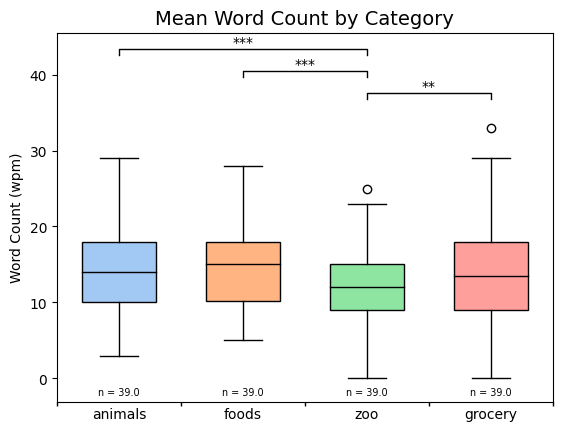

In [ ]:
box_and_whisker_paired(fluency_data, title, ylabel, xticklabels)

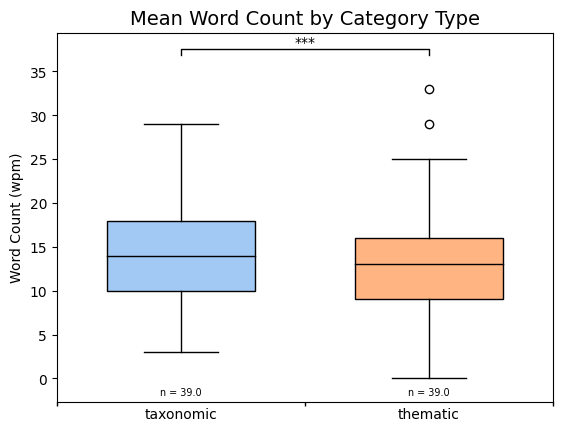

In [ ]:
# mean word count by taxonomic vs. thematic
fluency_data = [animal_wcs + food_wcs, zoo_wcs + grocery_wcs]
title = 'Mean Word Count by Category Type'
ylabel = 'Word Count (wpm)'
xticklabels = ['taxonomic', 'thematic']
box_and_whisker_paired(fluency_data, title, ylabel, xticklabels, nsplit=4)

In [ ]:
def wc(animals, foods, zoo, grocery):
  # mean word count by category
  animal_wcs = []
  food_wcs = []
  zoo_wcs = []
  grocery_wcs = []

  for l in animals:
    animal_wcs.append(len(l))
  for l in foods:
    food_wcs.append(len(l))
  for l in zoo:
    zoo_wcs.append(len(l))
  for l in grocery:
    grocery_wcs.append(len(l))

  return animal_wcs, food_wcs, zoo_wcs, grocery_wcs

In [ ]:
def id_array(relevant_ids, mult_num=2):
  new = []
  for id in relevant_ids:
    new += [id]*mult_num
  return new

In [ ]:
def category_array(category=None, num=78):
  return [category]*num

In [ ]:
ids = id_array(relevant_ids)

In [ ]:
animal = category_array(category='animals')
foods = category_array(category='foods')
zoo = category_array(category='zoo')
grocery = category_array(category='grocery')
taxonomic = category_array(category='taxonomic')
thematic = category_array(category='thematic')
animal_field = category_array(category='animal_field')
food_field = category_array(category='food_field')

In [ ]:
df_new = pd.DataFrame(list(zip(ids, animal, taxonomic, animal_field, animal_wcs)), columns=('id', 'category', 'category_type', 'semantic_field', 'word_count'))
df_new = pd.concat((df_new, pd.DataFrame(list(zip(ids, foods, taxonomic, food_field, food_wcs)), columns=('id', 'category', 'category_type', 'semantic_field', 'word_count'))))
df_new = pd.concat((df_new, pd.DataFrame(list(zip(ids, zoo, thematic, animal_field, zoo_wcs)), columns=('id', 'category', 'category_type', 'semantic_field', 'word_count'))))
df_new = pd.concat((df_new, pd.DataFrame(list(zip(ids, grocery, thematic, food_field, grocery_wcs)), columns=('id', 'category', 'category_type', 'semantic_field', 'word_count'))))

In [ ]:
df_wc = df_new

In [ ]:
df_wc.to_csv("/content/drive/MyDrive/Annie Senior Thesis/Results, Semantic Network Models/LexPlay_wc.csv")

## **Word Count violin plots** ##

In [ ]:
import seaborn

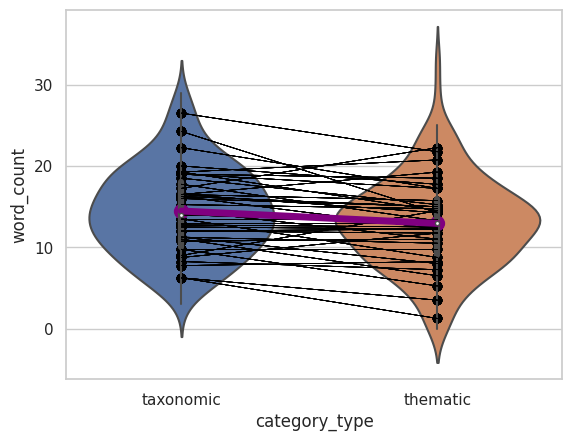

<Figure size 3000x3000 with 0 Axes>

In [ ]:
import seaborn as sns
# Create paired violin plot
sns.set(style="whitegrid")
sns.violinplot(x="category_type", y="word_count", data=df_new)

# Connect paired dots
for i in df_new['id']:
    plt.scatter([0, 1], [df_new[(df_new['id']== i) & (df_new['category_type'] =='taxonomic')]['word_count'].mean(),
                     df_new[(df_new['id']== i) & (df_new['category_type'] =='thematic')]['word_count'].mean()], color='black')
    plt.plot([0, 1], [df_new[(df_new['id']== i) & (df_new['category_type'] =='taxonomic')]['word_count'].mean(),
                     df_new[(df_new['id']== i) & (df_new['category_type'] =='thematic')]['word_count'].mean()], color='black', linewidth=0.5)

plt.scatter([0, 1], [df_new[(df_new['category_type'] =='taxonomic')]['word_count'].mean(),
                     df_new[(df_new['category_type'] =='thematic')]['word_count'].mean()], s=100, color='purple')

plt.plot([0, 1], [df_new[(df_new['category_type'] =='taxonomic')]['word_count'].mean(),
                     df_new[(df_new['category_type'] =='thematic')]['word_count'].mean()], linewidth=5, color='purple')

# Show the plot
plt.figure(figsize=(30,30))
plt.show()

## **Word Prevalence/Frequency** ##

In [ ]:
# Preprocess lists to remove adjectives
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
relevant_ids, toy_lists, animal_lists, food_lists, zoo_lists, grocery_lists = get_fluency_lists(df, age_year, age_mos, removemissing=True)

In [ ]:
# strip adjectives etc. to simplify list
def simplify_lists(lists):
  new_lists = []
  for l in lists:
    new_l = []
    for w in l:
      new_w = ''
      tokenized = word_tokenize(w)
      tagged = pos_tag(tokenized)
      for token in tagged:
        # remove the unclears
        if token[0] == ']': continue
        # don't add baby (doesn't seem to be considered as adj)
        if token[0] == 'baby': continue
        # add if noun
        if token[1] == 'NN': new_w += token[0]
      new_l.append(new_w)
    new_lists.append(new_l)

  return new_lists


In [ ]:
animal_lists_simp = simplify_lists(animal_lists)

In [ ]:
# import word prevalences
# The Zipf score is a standardized log-transformed measure of word frequency that is easy to understand (words with Zipf scores of 1–3 can be considered low-frequency words; words with Zipf scores of 4–7 can be considered high-frequency).
df_word_prev = pd.read_csv('/content/drive/MyDrive/Annie Senior Thesis/Results, Semantic Network Models/Fluency Lists Processing Analysis/analysis_norms/English_Word_Prevalence.csv')

In [ ]:
print(df_word_prev[df_word_prev['Word']=='bear']['FreqZipfUS'].iloc[0])

4.759


In [ ]:
'bear' in df_word_prev['Word'].tolist()

True

In [ ]:
# caveat: doesn't add any frequency if word not present in list of norms
def get_word_prevs(lists, df_word_prev):
  freq_lists = []
  for l in lists:
    freq_list = []
    for w in l:
      if w in df_word_prev['Word'].tolist():
        freq = df_word_prev[df_word_prev['Word']==w]['FreqZipfUS'].iloc[0]
        freq_list.append(freq)
    freq_lists.append(freq_list)

  return freq_lists


In [ ]:
animal_freqs = get_word_prevs(animal_lists_simp, df_word_prev)

In [ ]:
food_freqs = get_word_prevs(simplify_lists(food_lists), df_word_prev)

In [ ]:
zoo_freqs = get_word_prevs(simplify_lists(zoo_lists), df_word_prev)

In [ ]:
grocery_freqs = get_word_prevs(simplify_lists(grocery_lists), df_word_prev)

In [ ]:
# mean word frequency across lists
def mean_word_freqs(freq_lists):
  mean_freqs = []
  for l in freq_lists:
    if l==[]:
      mean_freqs.append(0)
      continue
    mean_freqs.append(np.nanmean(l))

  return mean_freqs

In [ ]:
mean_animal_f = mean_word_freqs(animal_freqs)
mean_food_f = mean_word_freqs(food_freqs)
mean_zoo_f = mean_word_freqs(zoo_freqs)
mean_grocery_f = mean_word_freqs(grocery_freqs)

In [ ]:
def id_array(relevant_ids, mult_num=2):
  new = []
  for id in relevant_ids:
    new += [id]*mult_num
  return new

In [ ]:
def category_array(category=None, num=74):
  return [category]*num

In [ ]:
ids = id_array(relevant_ids)
animal = category_array(category='animals')
foods = category_array(category='foods')
zoo = category_array(category='zoo')
grocery = category_array(category='grocery')
taxonomic = category_array(category='taxonomic')
thematic = category_array(category='thematic')
animal_field = category_array(category='animal_field')
food_field = category_array(category='food_field')

In [ ]:
df_new = pd.DataFrame(list(zip(ids, animal, taxonomic, animal_field, mean_animal_f)), columns=('id', 'category', 'category_type', 'semantic_field', 'frequency'))
df_new = pd.concat((df_new, pd.DataFrame(list(zip(ids, foods, taxonomic, food_field, mean_food_f)), columns=('id', 'category', 'category_type', 'semantic_field', 'frequency'))))
df_new = pd.concat((df_new, pd.DataFrame(list(zip(ids, zoo, thematic, animal_field, mean_zoo_f)), columns=('id', 'category', 'category_type', 'semantic_field', 'frequency'))))
df_new = pd.concat((df_new, pd.DataFrame(list(zip(ids, grocery, thematic, food_field, mean_grocery_f)), columns=('id', 'category', 'category_type', 'semantic_field', 'frequency'))))

In [ ]:
df_freq = df_new

In [ ]:
df_freq.to_csv("/content/drive/MyDrive/Annie Senior Thesis/Results, Semantic Network Models/LexPlay_freqs.csv")

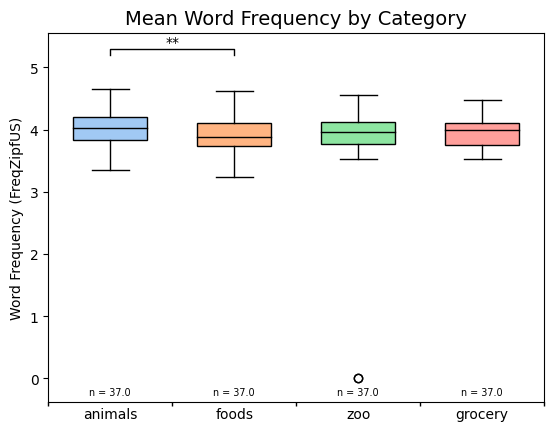

In [ ]:
frequency_data = [mean_animal_f, mean_food_f, mean_zoo_f, mean_grocery_f]
title = 'Mean Word Frequency by Category'
ylabel = 'Word Frequency (FreqZipfUS)'
xticklabels = ['animals', 'foods', 'zoo', 'grocery']
box_and_whisker_paired(frequency_data, title, ylabel, xticklabels)

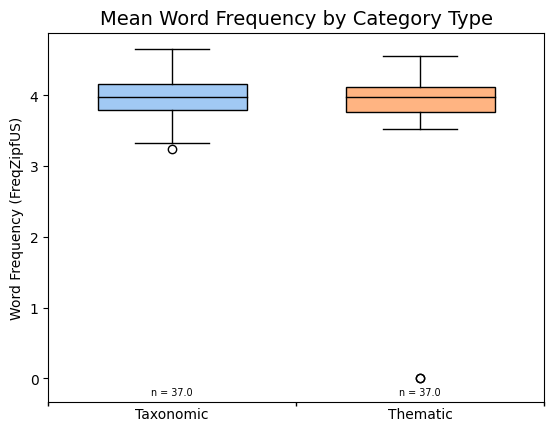

In [ ]:
frequency_data = [mean_animal_f + mean_food_f, mean_zoo_f + mean_grocery_f]
title = 'Mean Word Frequency by Category Type'
ylabel = 'Word Frequency (FreqZipfUS)'
xticklabels = ['Taxonomic', 'Thematic']
box_and_whisker_paired(frequency_data, title, ylabel, xticklabels, nsplit=4)

In [ ]:
wcs = wc(animal_lists, food_lists, zoo_lists, grocery_lists)

Text(0.5, 1.0, 'Mean Frequencies vs. Mean Word Count for Animal Lists')

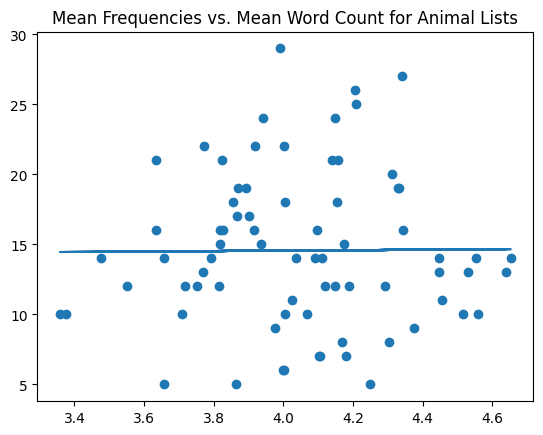

In [ ]:
plt.scatter(mean_animal_f, wcs[0])
a, b = np.polyfit(mean_animal_f, wcs[0], 1)
plt.plot(mean_animal_f, a*np.array(mean_animal_f)+b)
plt.title("Mean Frequencies vs. Mean Word Count for Animal Lists")

## **Age of Acquisitions Norms** ##

In [ ]:
df_aoa = pd.read_csv('/content/drive/MyDrive/Annie Senior Thesis/Results, Semantic Network Models/Fluency Lists Processing Analysis/analysis_norms/kuperman.csv')

In [ ]:
df_aoa

,#word,val
0,a,2.89
1,aardvark,9.89
2,abacus,8.69
3,abalone,12.23
4,abandon,8.32
...,...,...
31100,zoom,8.57
31101,zoon,12.43
31102,zucchini,6.79
31103,zwieback,16.10


In [ ]:
# caveat: doesn't add any aoa if word not present in list of norms
def get_aoa(lists, df_aoa):
  aoa_lists = []
  for l in lists:
    aoa_list = []
    for w in l:
      if w in df_aoa['#word'].tolist():
        aoa = df_aoa[df_aoa['#word']==w]['val'].iloc[0]
        aoa_list.append(aoa)
    aoa_lists.append(aoa_list)

  return aoa_lists

# mean word frequency across lists
def mean_word_aoa(aoa_lists):
  mean_aoa = []
  for l in aoa_lists:
    if l==[]:
      mean_aoa.append(0)
      continue
    mean_aoa.append(np.mean(l))

  return mean_aoa

In [ ]:
animal_aoa = get_aoa(animal_lists_simp, df_aoa)

In [ ]:
food_aoa = get_aoa(simplify_lists(food_lists), df_aoa)

In [ ]:
zoo_aoa = get_aoa(simplify_lists(zoo_lists), df_aoa)

In [ ]:
grocery_aoa = get_aoa(simplify_lists(grocery_lists), df_aoa)

In [ ]:
mean_animal_aoa = mean_word_aoa(animal_aoa)
mean_food_aoa = mean_word_aoa(food_aoa)
mean_zoo_aoa = mean_word_aoa(zoo_aoa)
mean_grocery_aoa = mean_word_aoa(grocery_aoa)

In [ ]:
def id_array(relevant_ids, mult_num=2):
  new = []
  for id in relevant_ids:
    new += [id]*mult_num
  return new

In [ ]:
def category_array(category=None, num=74):
  return [category]*num

In [ ]:
ids = id_array(relevant_ids)
animal = category_array(category='animals')
foods = category_array(category='foods')
zoo = category_array(category='zoo')
grocery = category_array(category='grocery')
taxonomic = category_array(category='taxonomic')
thematic = category_array(category='thematic')
animal_field = category_array(category='animal_field')
food_field = category_array(category='food_field')

In [ ]:
df_new = pd.DataFrame(list(zip(ids, animal, taxonomic, animal_field, mean_animal_aoa)), columns=('id', 'category', 'category_type', 'semantic_field', 'aoa'))
df_new = pd.concat((df_new, pd.DataFrame(list(zip(ids, foods, taxonomic, food_field, mean_food_aoa)), columns=('id', 'category', 'category_type', 'semantic_field', 'aoa'))))
df_new = pd.concat((df_new, pd.DataFrame(list(zip(ids, zoo, thematic, animal_field, mean_zoo_aoa)), columns=('id', 'category', 'category_type', 'semantic_field', 'aoa'))))
df_new = pd.concat((df_new, pd.DataFrame(list(zip(ids, grocery, thematic, food_field, mean_grocery_aoa)), columns=('id', 'category', 'category_type', 'semantic_field', 'aoa'))))

In [ ]:
df_new.to_csv("/content/drive/MyDrive/Annie Senior Thesis/Results, Semantic Network Models/LexPlay_aoa.csv")

In [ ]:
df_aoa = df_new

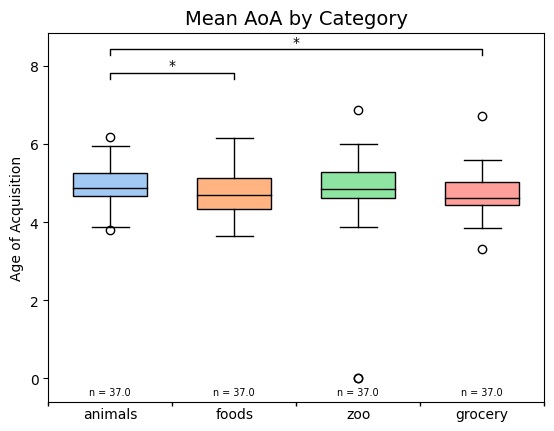

In [ ]:
frequency_data = [mean_animal_aoa, mean_food_aoa, mean_zoo_aoa, mean_grocery_aoa]
title = 'Mean AoA by Category'
ylabel = 'Age of Acquisition'
xticklabels = ['animals', 'foods', 'zoo', 'grocery']
box_and_whisker_paired(frequency_data, title, ylabel, xticklabels)

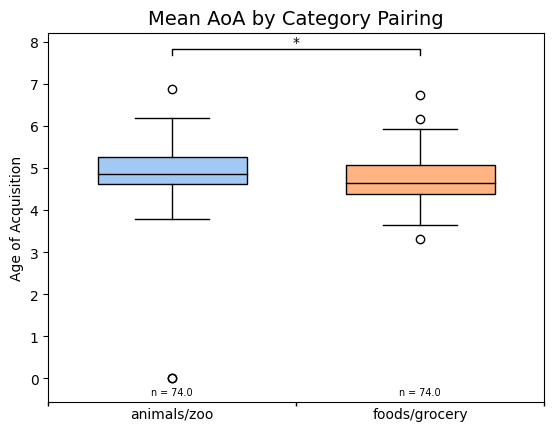

In [ ]:
frequency_data = [mean_animal_aoa + mean_zoo_aoa, mean_food_aoa + mean_grocery_aoa]
title = 'Mean AoA by Category Pairing'
ylabel = 'Age of Acquisition'
xticklabels = ['animals/zoo', 'foods/grocery']
box_and_whisker_paired(frequency_data, title, ylabel, xticklabels)

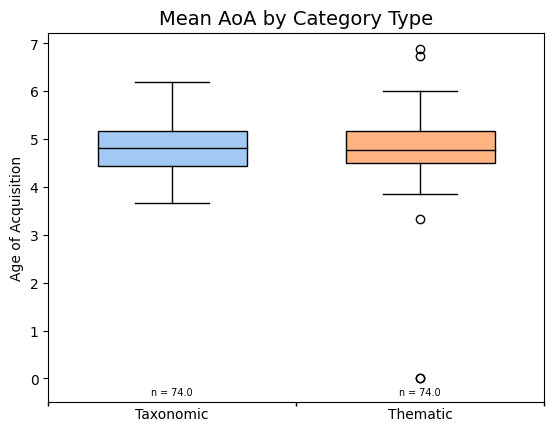

In [ ]:
frequency_data = [mean_animal_aoa + mean_food_aoa, mean_zoo_aoa + mean_grocery_aoa]
title = 'Mean AoA by Category Type'
ylabel = 'Age of Acquisition'
xticklabels = ['Taxonomic', 'Thematic']
box_and_whisker_paired(frequency_data, title, ylabel, xticklabels)

## **Concreteness Norms** ##

In [ ]:
df_conc = pd.read_csv('/content/drive/MyDrive/Annie Senior Thesis/Results, Semantic Network Models/Fluency Lists Processing Analysis/analysis_norms/concreteness.csv')

In [ ]:
df_conc['Word']

0                     a
1              aardvark
2                 aback
3                abacus
4               abandon
              ...      
39949    zebra crossing
39950    zero tolerance
39951          ZIP code
39952           zoom in
39953         zoom lens
Name: Word, Length: 39954, dtype: object

In [ ]:
# caveat: doesn't add anything if word not present in list of norms
def get_conc(lists, df_conc):
  conc_lists = []
  for l in lists:
    conc_list = []
    for w in l:
      if w in df_conc['Word'].tolist():
        conc = df_conc[df_conc['Word']==w]['Conc.M'].iloc[0]
        conc_list.append(conc)
    conc_lists.append(conc_list)

  return conc_lists

# mean concreteness across lists
def mean_word_conc(conc_lists):
  mean_conc = []
  for l in conc_lists:
    if l==[]:
      conc_lists.append(0)
      continue
    mean_conc.append(np.mean(l))

  return mean_conc

In [ ]:
animal_conc = get_conc(animal_lists_simp, df_conc)

In [ ]:
food_conc = get_conc(simplify_lists(food_lists), df_conc)

In [ ]:
zoo_conc = get_conc(simplify_lists(zoo_lists), df_conc)

In [ ]:
grocery_conc = get_conc(simplify_lists(grocery_lists), df_conc)

In [ ]:
mean_animal_conc = mean_word_conc(animal_conc)
mean_food_conc = mean_word_conc(food_conc)
mean_zoo_conc = mean_word_conc(zoo_conc)
mean_grocery_conc = mean_word_conc(grocery_conc)

In [ ]:
def id_array(relevant_ids, mult_num=2):
  new = []
  for id in relevant_ids:
    new += [id]*mult_num
  return new

In [ ]:
def category_array(category=None, num=74):
  return [category]*num

In [ ]:
ids = id_array(relevant_ids)
animal = category_array(category='animals')
foods = category_array(category='foods')
zoo = category_array(category='zoo')
grocery = category_array(category='grocery')
taxonomic = category_array(category='taxonomic')
thematic = category_array(category='thematic')
animal_field = category_array(category='animal_field')
food_field = category_array(category='food_field')

In [ ]:
df_new = pd.DataFrame(list(zip(ids, animal, taxonomic, animal_field, mean_animal_conc)), columns=('id', 'category', 'category_type', 'semantic_field', 'concreteness'))
df_new = pd.concat((df_new, pd.DataFrame(list(zip(ids, foods, taxonomic, food_field, mean_food_conc)), columns=('id', 'category', 'category_type', 'semantic_field', 'concreteness'))))
df_new = pd.concat((df_new, pd.DataFrame(list(zip(ids, zoo, thematic, animal_field, mean_zoo_conc)), columns=('id', 'category', 'category_type', 'semantic_field', 'concreteness'))))
df_new = pd.concat((df_new, pd.DataFrame(list(zip(ids, grocery, thematic, food_field, mean_grocery_conc)), columns=('id', 'category', 'category_type', 'semantic_field', 'concreteness'))))

In [ ]:
df_new.to_csv("/content/drive/MyDrive/Annie Senior Thesis/Results, Semantic Network Models/LexPlay_concreteness.csv")

In [ ]:
df_conc = df_new

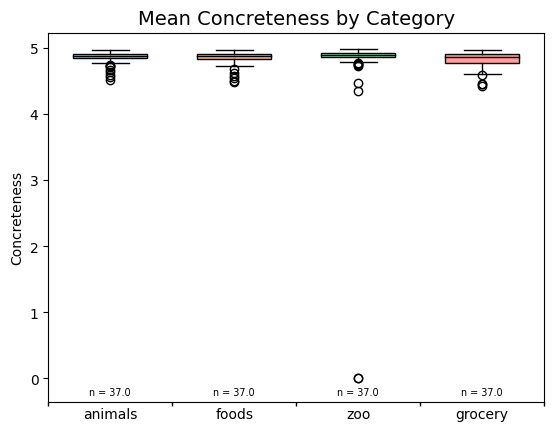

In [ ]:
frequency_data = [mean_animal_conc, mean_food_conc, mean_zoo_conc, mean_grocery_conc]
title = 'Mean Concreteness by Category'
ylabel = 'Concreteness'
xticklabels = ['animals', 'foods', 'zoo', 'grocery']
box_and_whisker_paired(frequency_data, title, ylabel, xticklabels)

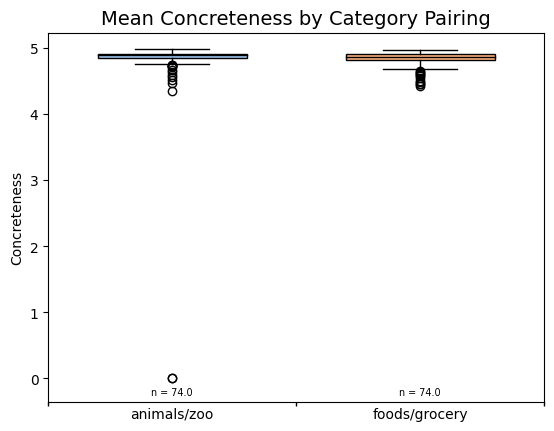

In [ ]:
frequency_data = [mean_animal_conc + mean_zoo_conc, mean_food_conc + mean_grocery_conc]
title = 'Mean Concreteness by Category Pairing'
ylabel = 'Concreteness'
xticklabels = ['animals/zoo', 'foods/grocery']
box_and_whisker_paired(frequency_data, title, ylabel, xticklabels)

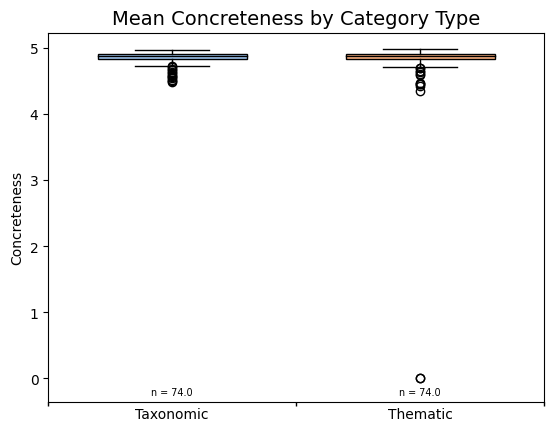

In [ ]:
frequency_data = [mean_animal_conc + mean_food_conc, mean_zoo_conc + mean_grocery_conc]
title = 'Mean Concreteness by Category Type'
ylabel = 'Concreteness'
xticklabels = ['Taxonomic', 'Thematic']
box_and_whisker_paired(frequency_data, title, ylabel, xticklabels)

In [ ]:
relevant_id_indices = [id-1 for id in ids]
relevant_age_mos = [float(age_mos[id]) for id in relevant_id_indices]
df_new['age'] = relevant_age_mos*4

In [ ]:
df_new

,id,category,category_type,semantic_field,concreteness,aoa,frequency
0,7,animals,taxonomic,animal_field,4.884286,5.192143,3.818357
1,7,animals,taxonomic,animal_field,4.894348,4.786957,4.208913
2,8,animals,taxonomic,animal_field,4.863333,4.690833,4.119833
3,8,animals,taxonomic,animal_field,4.875000,4.105000,4.559500
4,9,animals,taxonomic,animal_field,4.884545,4.870909,4.024273
...,...,...,...,...,...,...,...
69,47,grocery,thematic,food_field,4.876471,4.867647,4.086588
70,48,grocery,thematic,food_field,4.958750,4.512500,3.744125
71,48,grocery,thematic,food_field,4.956250,4.441250,3.811500
72,49,grocery,thematic,food_field,4.918571,4.340000,4.062000


In [ ]:
df_wc

,id,category,category_type,semantic_field,word_count
0,7,animals,taxonomic,animal_field,15
1,7,animals,taxonomic,animal_field,25
2,8,animals,taxonomic,animal_field,12
3,8,animals,taxonomic,animal_field,10
4,9,animals,taxonomic,animal_field,11
...,...,...,...,...,...
69,47,grocery,thematic,food_field,20
70,48,grocery,thematic,food_field,9
71,48,grocery,thematic,food_field,14
72,49,grocery,thematic,food_field,19


In [ ]:
df_new['aoa'] = df_aoa['aoa']
df_new['frequency'] = df_freq['frequency']
df_new['word_count'] = df_wc['word_count']
df_new['concreteness'] = df_conc['concreteness']

In [ ]:
df_new.to_csv("/content/drive/MyDrive/Annie Senior Thesis/Results, Semantic Network Models/LexPlay_compiled_norms.csv")